In [1]:
import tensorflow as tf

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import SGD, Adam

In [75]:
import numpy as np

try:
  
  loaded_data = np.loadtxt('./diabetes.csv', delimiter = ',')

  x_data = loaded_data[ :, :-1]
  t_data = loaded_data[ :, [-1]]

  print('x_data.shape = ', x_data.shape)
  print('t_data.shape = ', t_data.shape)

except Exception as err:

  print(str(err))

x_data.shape =  (759, 8)
t_data.shape =  (759, 1)


In [76]:
TEST_SPLIT_RATIO = 0.1

test_nums = int(TEST_SPLIT_RATIO * len(x_data))

print('test_nums =', test_nums)

x_test = x_data[:test_nums]
t_test = t_data[:test_nums]

x_data = x_data[test_nums:]
t_data = t_data[test_nums:]

print(x_data.shape, t_data.shape)
print(x_test.shape, t_test.shape)

test_nums = 75
(684, 8) (684, 1)
(75, 8) (75, 1)


In [77]:
SPLIT_RATIO = 0.1

val_nums = int(SPLIT_RATIO * len(x_data))

print('val_nums = ', val_nums)

x_val = x_data[:val_nums] # 0 - 74까지 validation set
t_val = t_data[:val_nums]

x_data = x_data[val_nums:]
t_data = t_data[val_nums:]

print(x_data.shape, t_data.shape)
print(x_val.shape, t_val.shape)

val_nums =  68
(616, 8) (616, 1)
(68, 8) (68, 1)


In [78]:
model = Sequential()

model.add(Dense(2, input_shape = (x_data.shape[1], ), activation = 'softmax'))

In [79]:
model.compile(optimizer = SGD(learning_rate = 0.01), loss = 'sparse_categorical_crossentropy', metrics = ['accuracy'])

In [80]:
model.summary()

Model: "sequential_12"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_11 (Dense)            (None, 2)                 18        
                                                                 
Total params: 18
Trainable params: 18
Non-trainable params: 0
_________________________________________________________________


In [81]:
from datetime import datetime

start_time = datetime.now()

hist = model.fit(x_data, t_data, epochs = 500, validation_data = (x_val, t_val), verbose = 2)

end_time = datetime.now()

print('Elapsed time =>> ', end_time - start_time)

## 19/19는 training data의 batch size를 말함 (default 값이 32이여서 758 * 0.8 / 32 = 19임 )
### val_loss, val_accuracy --> validation set을 하는 것임

Epoch 1/500
20/20 - 1s - loss: 0.6914 - accuracy: 0.5503 - val_loss: 0.6614 - val_accuracy: 0.5147 - 639ms/epoch - 32ms/step
Epoch 2/500
20/20 - 0s - loss: 0.6705 - accuracy: 0.5731 - val_loss: 0.6399 - val_accuracy: 0.6324 - 44ms/epoch - 2ms/step
Epoch 3/500
20/20 - 0s - loss: 0.6565 - accuracy: 0.5909 - val_loss: 0.6257 - val_accuracy: 0.7206 - 49ms/epoch - 2ms/step
Epoch 4/500
20/20 - 0s - loss: 0.6471 - accuracy: 0.6201 - val_loss: 0.6151 - val_accuracy: 0.7059 - 44ms/epoch - 2ms/step
Epoch 5/500
20/20 - 0s - loss: 0.6399 - accuracy: 0.6331 - val_loss: 0.6070 - val_accuracy: 0.7353 - 65ms/epoch - 3ms/step
Epoch 6/500
20/20 - 0s - loss: 0.6344 - accuracy: 0.6429 - val_loss: 0.5995 - val_accuracy: 0.7353 - 56ms/epoch - 3ms/step
Epoch 7/500
20/20 - 0s - loss: 0.6292 - accuracy: 0.6477 - val_loss: 0.5934 - val_accuracy: 0.7206 - 44ms/epoch - 2ms/step
Epoch 8/500
20/20 - 0s - loss: 0.6251 - accuracy: 0.6477 - val_loss: 0.5881 - val_accuracy: 0.7206 - 44ms/epoch - 2ms/step
Epoch 9/500
20

In [82]:
model.evaluate(x_test, t_test)

3/3 [==============================] - 0s 3ms/step - loss: 0.5693 - accuracy: 0.6933


[0.5693021416664124, 0.6933333277702332]

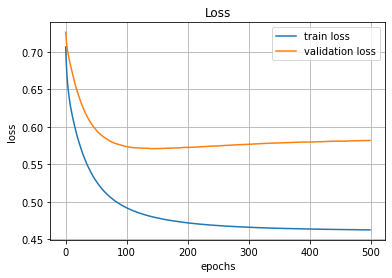

In [72]:
import matplotlib.pyplot as plt

plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.grid()

plt.plot(hist.history['loss'], label = 'train loss')
plt.plot(hist.history['val_loss'], label = 'validation loss')

plt.legend(loc = 'best')

plt.show()

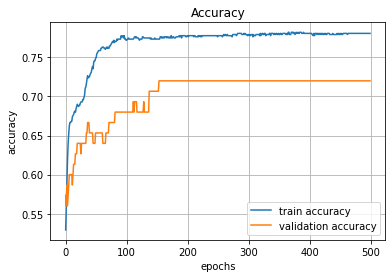

In [73]:
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.grid()

plt.plot(hist.history['accuracy'], label = 'train accuracy')
plt.plot(hist.history['val_accuracy'], label = 'validation accuracy')

plt.legend(loc = 'best')

plt.show(
)

In [74]:
model.weights

[<tf.Variable 'dense_10/kernel:0' shape=(8, 2) dtype=float32, numpy=
 array([[ 0.08924189, -0.8460155 ],
        [ 2.3513777 , -1.2270085 ],
        [-0.1422977 , -0.13258855],
        [ 0.782188  , -0.2533301 ],
        [-0.03286359, -0.19215523],
        [ 1.5026842 , -0.3323789 ],
        [ 0.65469944, -0.5453705 ],
        [-0.2611181 , -0.27294734]], dtype=float32)>,
 <tf.Variable 'dense_10/bias:0' shape=(2,) dtype=float32, numpy=array([-0.0306134 ,  0.03061342], dtype=float32)>]